# EDA FOR MAVERIK


### SUBMITTED BY: TARUN GULATI

## BUSINESS PROBLEM STATEMENT

### A retail convenience chain, Maverik, fuels adventures in more than 380 locations across 12 western states. Maverik is known for premium BonFire food, diesel and unleaded fuel, and in-store merchandise. The company is on an expansion spree and as part of its growth, it recently acquired “ Kum & Go” nearly doubling its store count.The business problem for Maverik is centered around planning, forecasting, and reporting for their new stores. Specifically, they need to provide accurate daily forecasts for a new store's first-year sales. This involves creating a model that can predict daily sales for upcoming new stores for the first year, taking into account seasonality and multiple sales metrics. 

In [104]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [105]:
# Load the time series dataset

time_series_data = pd.read_csv('time_series_data_msba.csv')

In [106]:
# Load the qualitative dataset

qualitative_data = pd.read_csv('qualitative_data_msba.csv')

In [101]:
# Data Overview

print("Time Series Data Overview:")
print(time_series_data.info())

Time Series Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908 entries, 0 to 13907
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Unnamed: 0                          13908 non-null  int64         
 1   capital_projects.soft_opening_date  13908 non-null  object        
 2   calendar.calendar_day_date          13908 non-null  datetime64[ns]
 3   calendar.fiscal_week_id_for_year    13908 non-null  int64         
 4   calendar.day_of_week                13908 non-null  object        
 5   calendar_information.holiday        13908 non-null  object        
 6   calendar_information.type_of_day    13908 non-null  object        
 7   daily_yoy_ndt.total_inside_sales    13908 non-null  float64       
 8   daily_yoy_ndt.total_food_service    13908 non-null  float64       
 9   diesel                              13908 non-null  float64       


In [5]:
# Data Overview

print("\nQualitative Data Overview:")
print(qualitative_data.info())


Qualitative Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                            

# Target Variables:

## In this dataset, we have multiple sales metrics as target variables. The primary target variables are:

### - 'diesel': Diesel gallons sold
### - 'unleaded': All non-diesel gallons
### - 'daily_yoy_ndt.total_inside_sales': Inside sales, everything that isn't made at the store
### - 'daily_yoy_ndt.total_food_service': Food service sales, everything that is made at the store


In [8]:
# Summary Statistics for Time Series Data

print("Summary Statistics for Time Series Data:")
print(time_series_data.describe())

Summary Statistics for Time Series Data:
         Unnamed: 0  calendar.fiscal_week_id_for_year  \
count  13908.000000                      13908.000000   
mean    6954.500000                         26.501079   
std     4015.038107                         14.998715   
min        1.000000                          1.000000   
25%     3477.750000                         14.000000   
50%     6954.500000                         26.000000   
75%    10431.250000                         39.000000   
max    13908.000000                         52.000000   

       daily_yoy_ndt.total_inside_sales  daily_yoy_ndt.total_food_service  \
count                      13908.000000                      13908.000000   
mean                        2846.537988                        759.922326   
std                          981.299870                        341.578220   
min                            0.000000                          0.000000   
25%                         2181.156250                     

In [9]:
# Summary Statistics for Qualitative Data

print("Summary Statistics for Qualitative Data:")
print(qualitative_data.describe())

Summary Statistics for Qualitative Data:
       Unnamed: 0    open_year  square_feet  front_door_count  \
count   37.000000    37.000000     37.00000              37.0   
mean    19.000000  2021.324324   4970.27027               2.0   
std     10.824355     0.474579    575.93121               0.0   
min      1.000000  2021.000000   2933.00000               2.0   
25%     10.000000  2021.000000   5046.00000               2.0   
50%     19.000000  2021.000000   5046.00000               2.0   
75%     28.000000  2022.000000   5046.00000               2.0   
max     37.000000  2022.000000   6134.00000               2.0   

       years_since_last_project  parking_spaces   x1_mile_pop   x1_mile_emp  \
count                 37.000000       37.000000     37.000000     37.000000   
mean                   1.648649       37.405405   6703.567568   4757.648649   
std                    0.483978        5.918237   5694.011350   4697.168291   
min                    1.000000       23.000000      0.00

In [10]:
# Check for Missing Values in Time Series Data

print("Missing Values in Time Series Data:")
print(time_series_data.isnull().sum())

Missing Values in Time Series Data:
Unnamed: 0                            0
capital_projects.soft_opening_date    0
calendar.calendar_day_date            0
calendar.fiscal_week_id_for_year      0
calendar.day_of_week                  0
calendar_information.holiday          0
calendar_information.type_of_day      0
daily_yoy_ndt.total_inside_sales      0
daily_yoy_ndt.total_food_service      0
diesel                                0
unleaded                              0
site_id_msba                          0
dtype: int64


In [11]:
# Check for Missing Values in Qualitative Data

print("\nMissing Values in Qualitative Data:")
print(qualitative_data.isnull().sum())


Missing Values in Qualitative Data:
Unnamed: 0                                  0
open_year                                   0
square_feet                                 0
front_door_count                            0
years_since_last_project                    0
parking_spaces                              0
lottery                                     0
freal                                       0
bonfire_grill                               0
pizza                                       0
cinnabon                                    0
godfather_s_pizza                           0
ethanol_free                                0
diesel                                      0
hi_flow_lanes                               0
rv_lanes                                    0
hi_flow_rv_lanes                            0
def                                         0
cat_scales                                  0
car_wash                                    0
ev_charging                                

In [129]:
# Data cleaning and handling missing values 
# Drop rows with missing values for simplicity 

time_series_data.dropna(inplace=True)
qualitative_data.dropna(inplace=True)

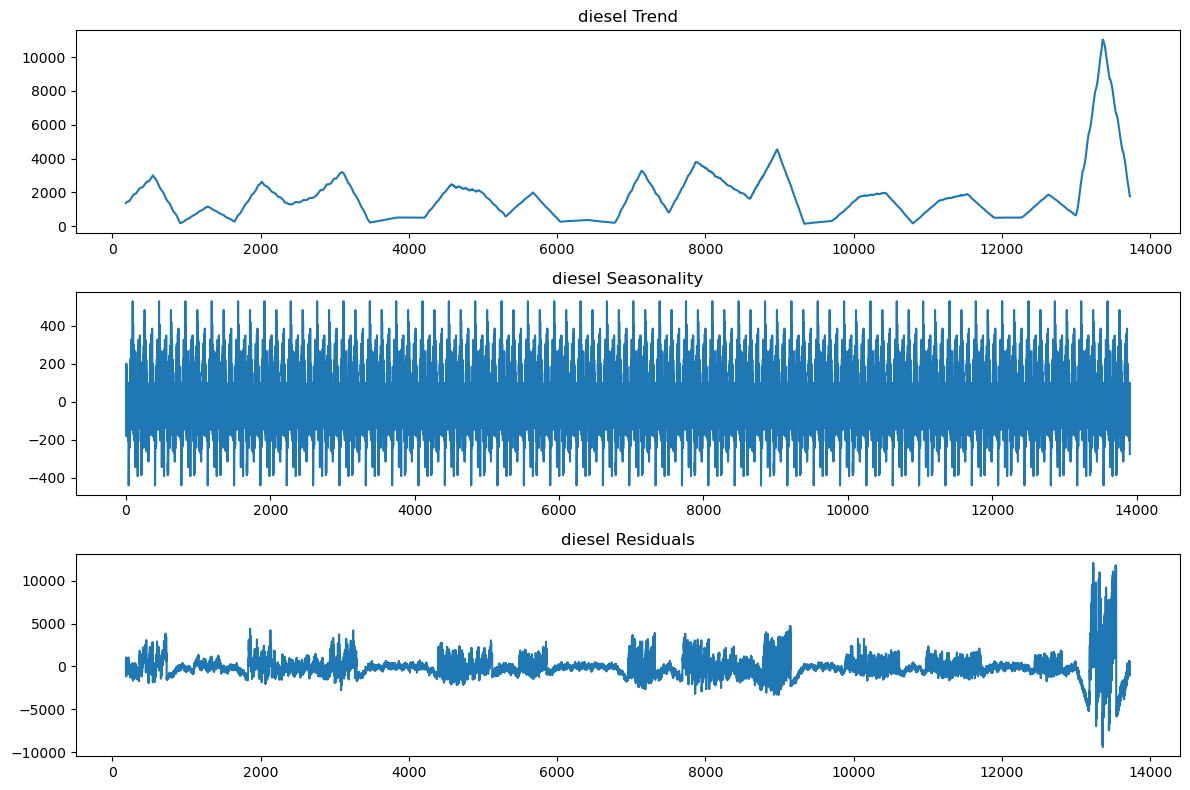

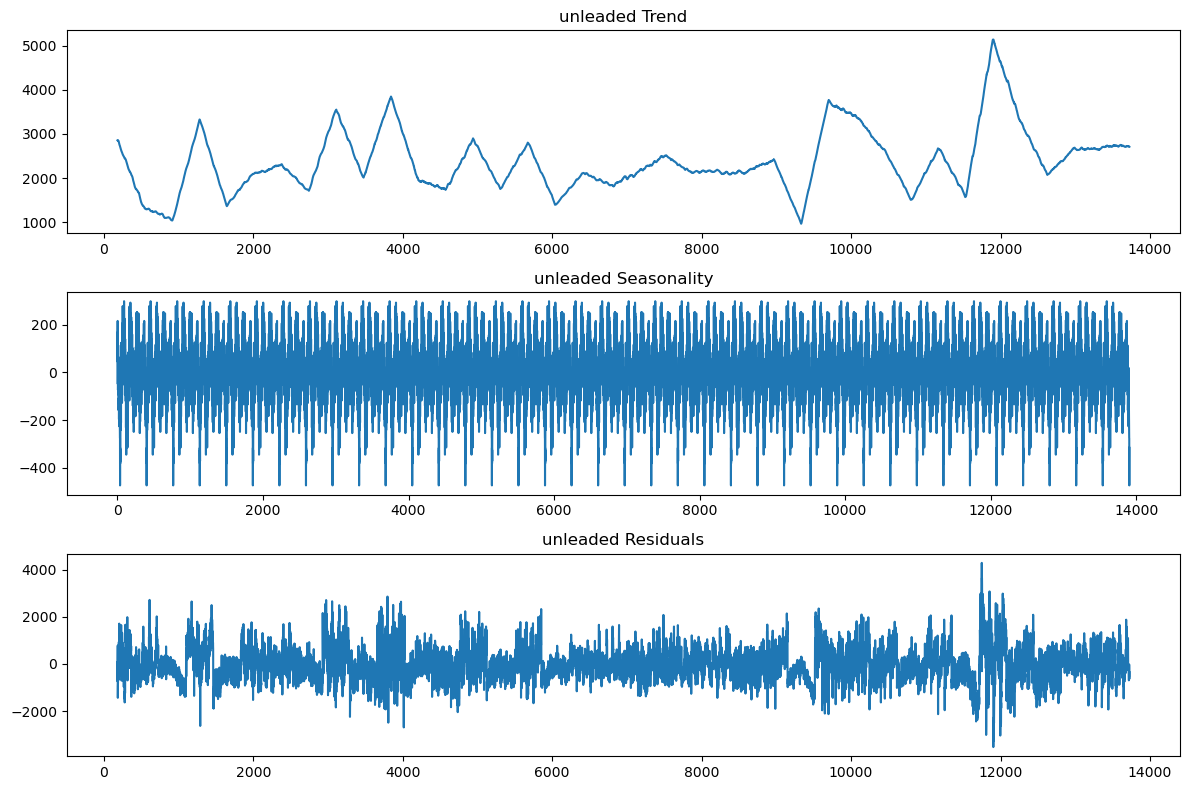

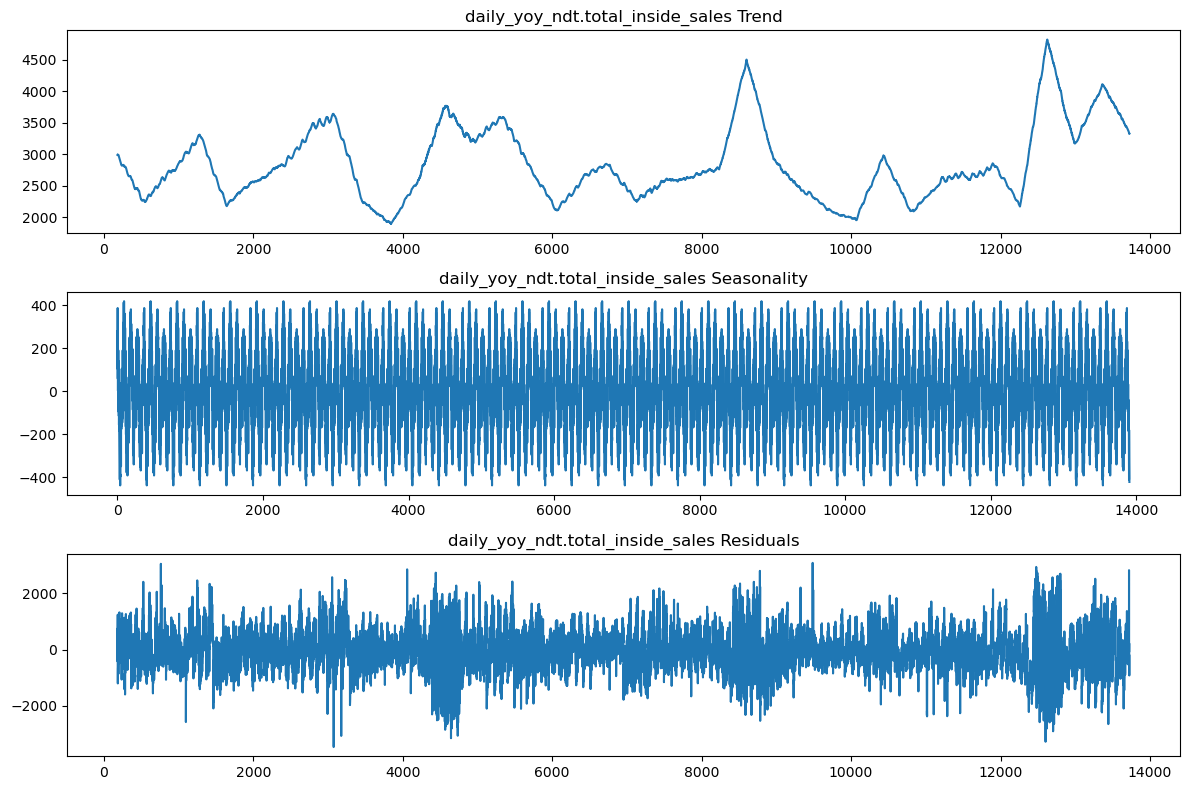

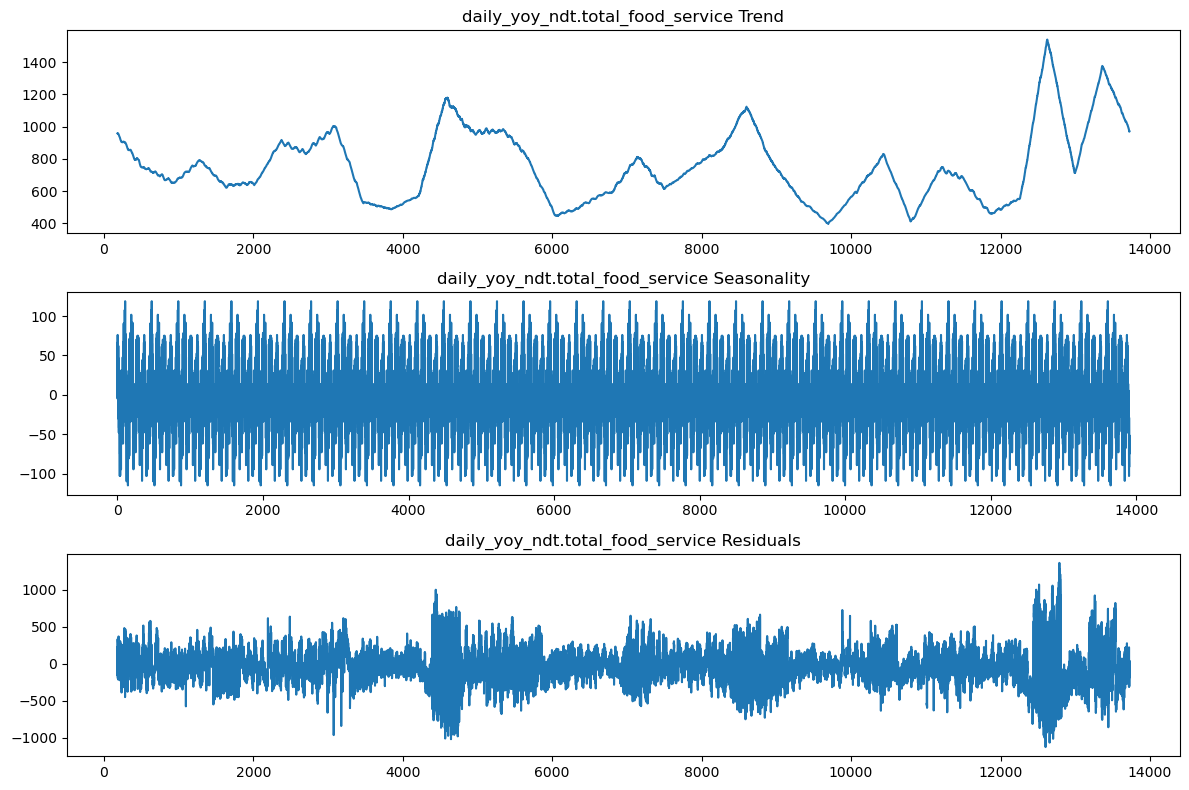

In [14]:
# Seasonality Exploration (Seasonal Decomposition)

for metric in sales_metrics:
    decomposition = seasonal_decompose(time_series_data[metric], model='additive', period=365)
    plt.figure(figsize=(12, 8))
    
    # Trend Plot
    plt.subplot(3, 1, 1)
    plt.plot(decomposition.trend)
    plt.title(f"{metric} Trend")
    
    # Seasonal Plot
    plt.subplot(3, 1, 2)
    plt.plot(decomposition.seasonal)
    plt.title(f"{metric} Seasonality")
    
    # Residuals Plot
    plt.subplot(3, 1, 3)
    plt.plot(decomposition.resid)
    plt.title(f"{metric} Residuals")
    
    plt.tight_layout()

plt.show()


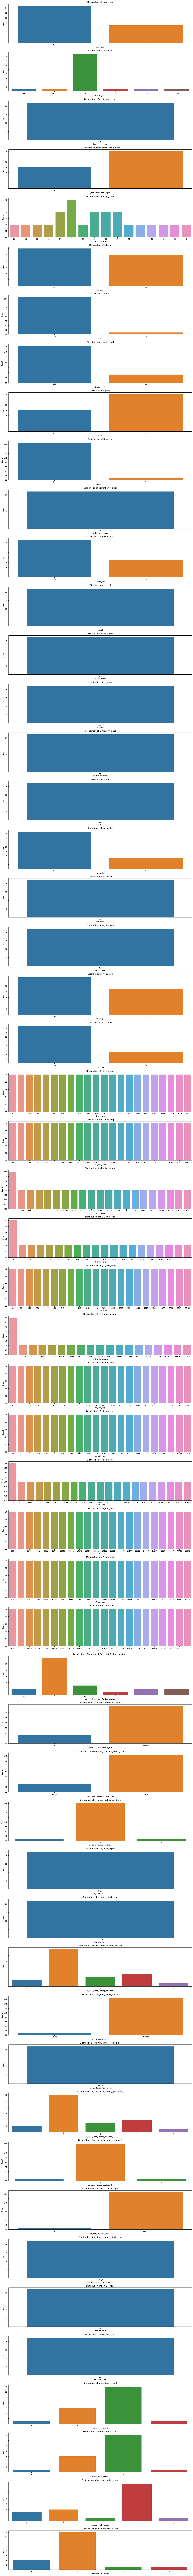

In [15]:
# Qualitative Data Exploration:

# Features to explore
features_to_explore = [
    'open_year', 'square_feet', 'front_door_count', 'years_since_last_project', 'parking_spaces',
    'lottery', 'freal', 'bonfire_grill', 'pizza', 'cinnabon', 'godfather_s_pizza', 'ethanol_free',
    'diesel', 'hi_flow_lanes', 'rv_lanes', 'hi_flow_rv_lanes', 'def', 'cat_scales', 'car_wash',
    'ev_charging', 'rv_dumps', 'propane', 'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
    'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop', 'x5_min_emp', 'x5_min_inc',
    'x7_min_pop', 'x7_min_emp', 'x7_min_inc', 'traditional_forecourt_fueling_positions',
    'traditional_forecourt_layout', 'traditional_forecourt_stack_type', 'rv_lanes_fueling_positions',
    'rv_lanes_layout', 'rv_lanes_stack_type', 'hi_flow_lanes_fueling_positions',
    'hi_flow_lanes_layout', 'hi_flow_lanes_stack_type', 'hi_flow_lanes_fueling_positions_2',
    'rv_lanes_fueling_positions_2', 'hi_flow_rv_lanes_layout', 'hi_flow_rv_lanes_stack_type',
    'non_24_hour', 'self_check_out', 'mens_toilet_count', 'mens_urinal_count',
    'womens_toilet_count', 'womens_sink_count'
]

# Created subplots for each feature

num_features = len(features_to_explore)
plt.figure(figsize=(16, 4 * num_features))

for i, feature in enumerate(features_to_explore):
    plt.subplot(num_features, 1, i + 1)
    sns.countplot(x=feature, data=qualitative_data)
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


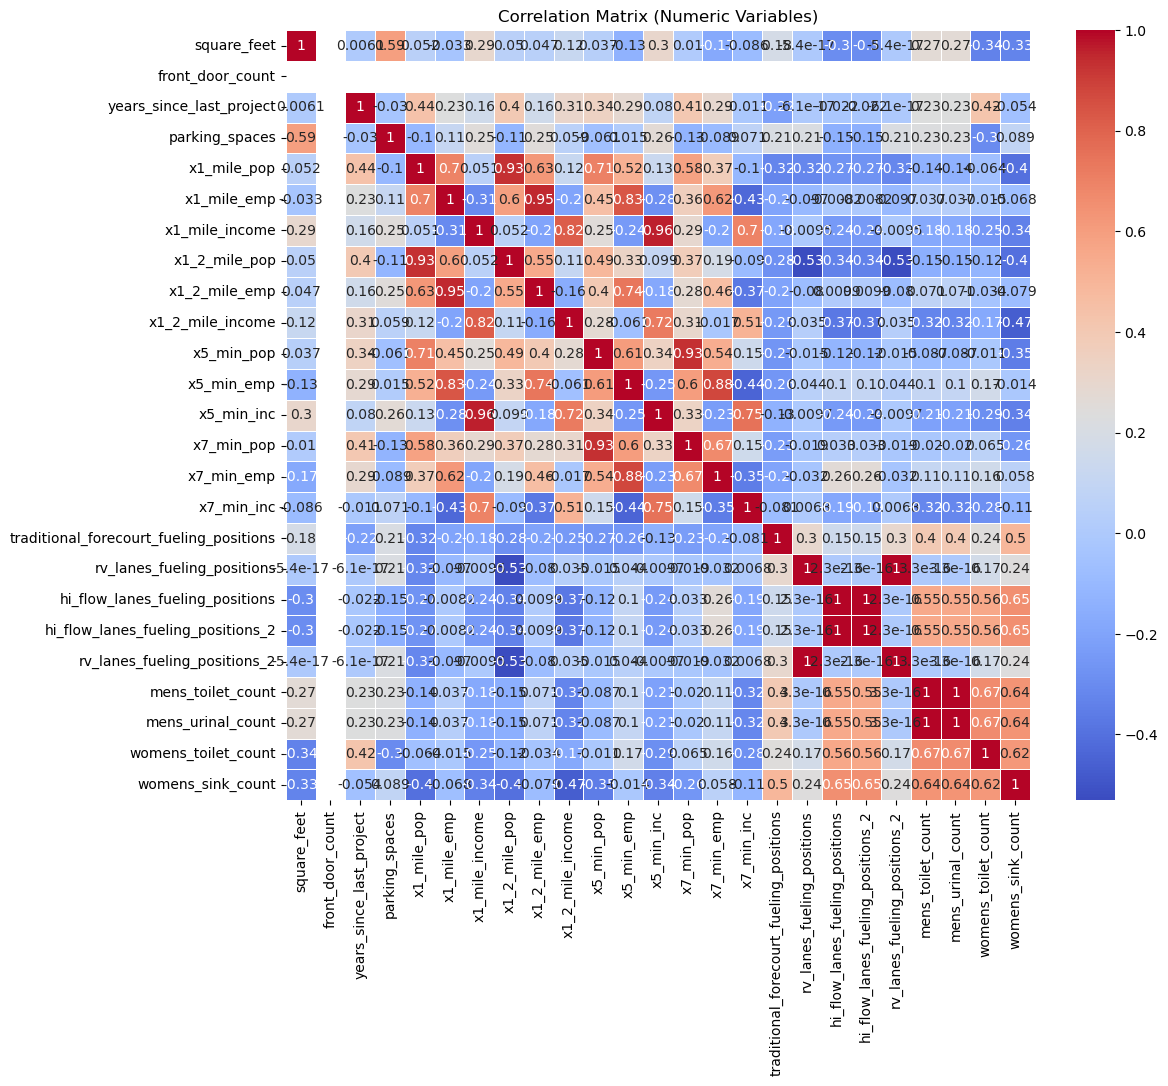

In [16]:
# Selected numeric columns for correlation analysis

numeric_columns = [
    'square_feet', 'front_door_count', 'years_since_last_project', 'parking_spaces',
    'x1_mile_pop', 'x1_mile_emp', 'x1_mile_income',
    'x1_2_mile_pop', 'x1_2_mile_emp', 'x1_2_mile_income', 'x5_min_pop', 'x5_min_emp', 'x5_min_inc',
    'x7_min_pop', 'x7_min_emp', 'x7_min_inc', 'traditional_forecourt_fueling_positions',
    'rv_lanes_fueling_positions',
    'hi_flow_lanes_fueling_positions',
    'hi_flow_lanes_fueling_positions_2',
    'rv_lanes_fueling_positions_2', 'mens_toilet_count', 'mens_urinal_count',
    'womens_toilet_count', 'womens_sink_count'
]

# Calculate the correlation matrix
correlation_matrix = qualitative_data[numeric_columns].corr()

# Create a heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Variables)")
plt.show()


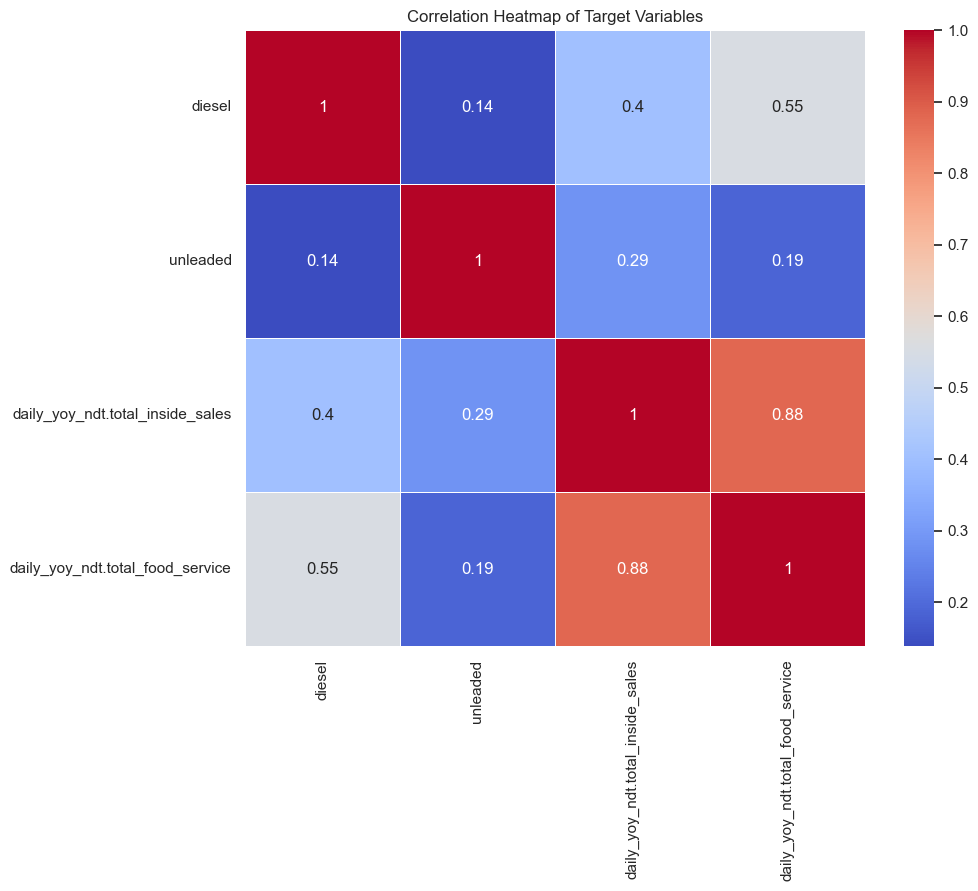

In [48]:
# Data Preprocessing:


# Explore correlations between target variables:

# Calculate the correlation matrix
correlation_matrix = time_series_data[sales_metrics].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Target Variables')
plt.show()





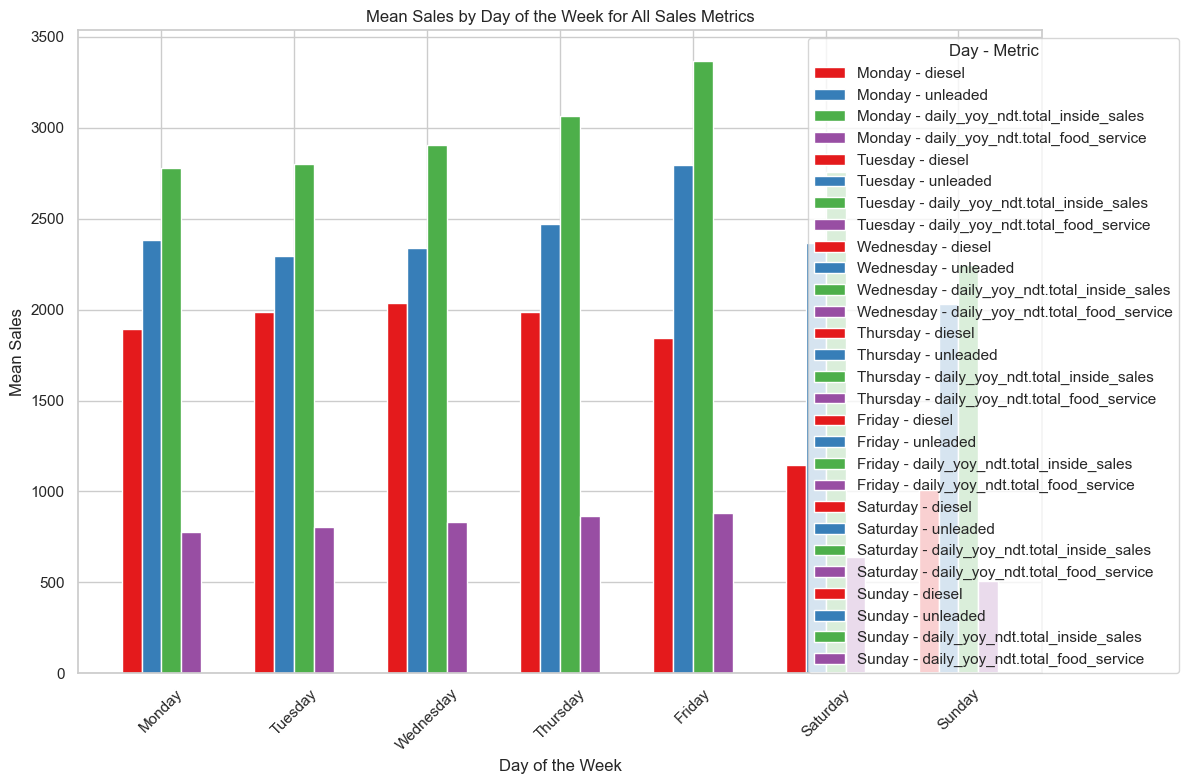

In [47]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the required libraries are installed, and install them if not
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    print("Required libraries not found. Please install Pandas, Matplotlib, and Seaborn.")

# Explore sales by day of the week:

# Assuming 'time_series_data' is your DataFrame and 'sales_metrics' is a list of sales columns

# Calculate the mean sales for each day of the week for all sales metrics
day_of_week_sales = time_series_data.groupby(time_series_data.index.day_name())[sales_metrics].mean()

# Reorder days of the week for better visualization
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week_sales = day_of_week_sales.reindex(days_order)

# Define color palettes for days and sales metrics
day_colors = sns.color_palette("husl", n_colors=len(day_of_week_sales))
metric_colors = sns.color_palette("Set1", n_colors=len(sales_metrics))

# Visualize mean sales for all sales metrics by day of the week
plt.figure(figsize=(12, 8))

# Width of each bar (for spacing)
bar_width = 0.15
num_metrics = len(sales_metrics)

# Loop through each day and create clustered bars for each sales metric
for i, (day, data) in enumerate(day_of_week_sales.iterrows()):
    for j, metric in enumerate(sales_metrics):
        # Calculate the x-coordinate for the bar
        x_coord = i + (j - (num_metrics - 1) / 2) * bar_width
        color = metric_colors[j]
        plt.bar(x_coord, data[metric], color=color, width=bar_width, label=f"{day} - {metric}")

plt.title('Mean Sales by Day of the Week for All Sales Metrics')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Sales')

# Set x-axis labels and tick positions
plt.xticks(range(len(days_order)), days_order, rotation=45)

# Create a legend with labels for each combination of day and sales metric
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1.0), title="Day - Metric")
plt.tight_layout()
plt.show()


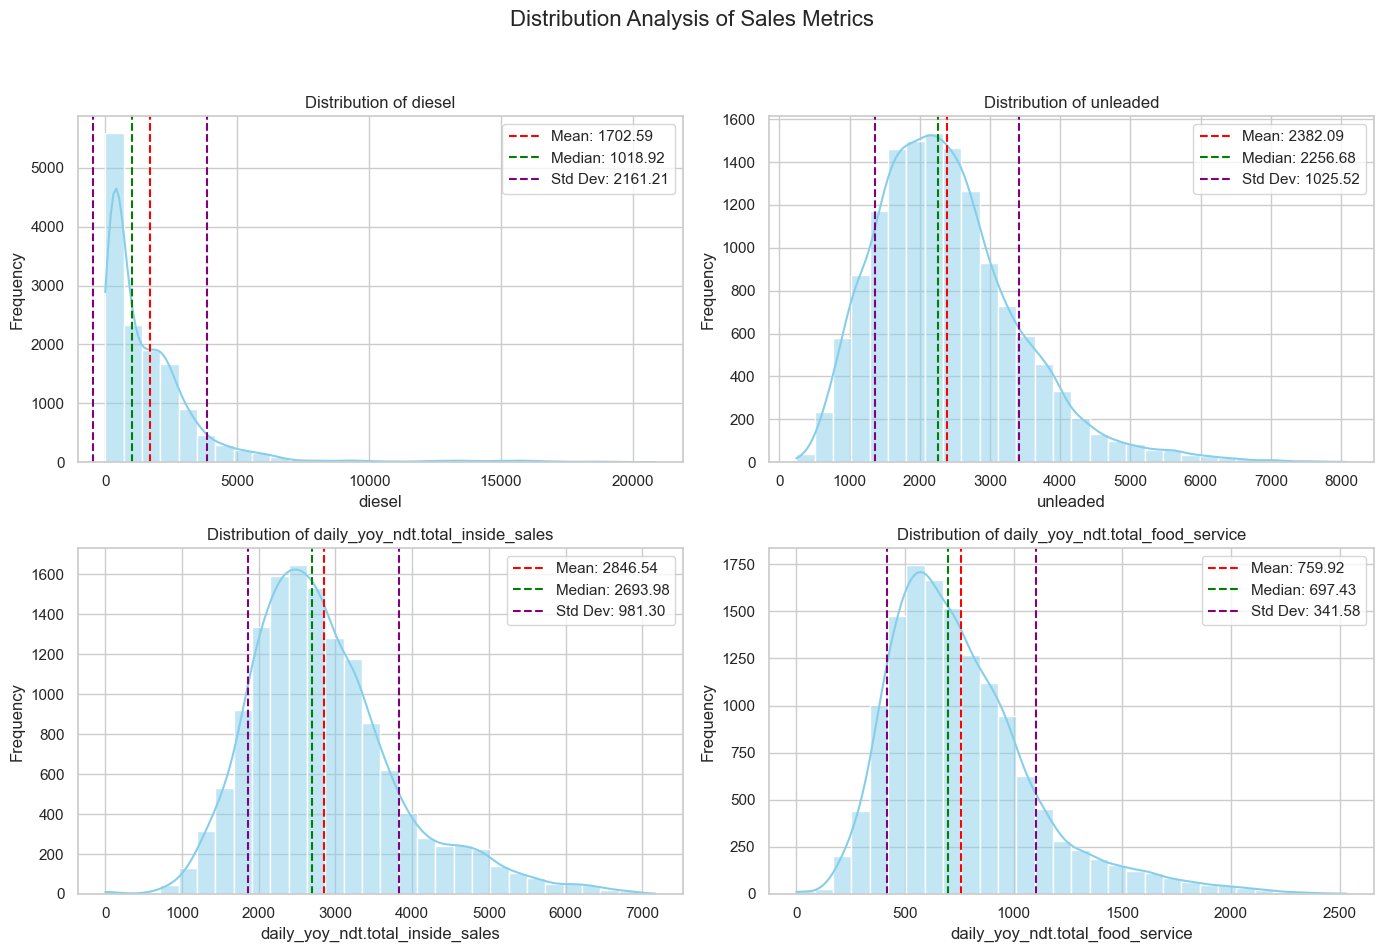

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing:

# Convert date columns to datetime objects
time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

# Set the date column as the index
time_series_data.set_index('calendar.calendar_day_date', inplace=True)

# Explore the distribution of target variables:

# Define the list of target variables
sales_metrics = ['diesel', 'unleaded', 'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, metric in enumerate(sales_metrics):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Create a histogram with kernel density estimate (KDE)
    sns.histplot(time_series_data[metric], bins=30, kde=True, color='skyblue', ax=ax)
    
    # Calculate and display statistics
    mean_value = time_series_data[metric].mean()
    median_value = time_series_data[metric].median()
    std_deviation = time_series_data[metric].std()
    
    ax.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
    ax.axvline(mean_value + std_deviation, color='purple', linestyle='--', label=f'Std Dev: {std_deviation:.2f}')
    ax.axvline(mean_value - std_deviation, color='purple', linestyle='--')
    
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')
    ax.legend()

# Add a main title to the entire plot
plt.suptitle('Distribution Analysis of Sales Metrics', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot spacing and title position
plt.show()


### Distribution of diesel

#### The distribution of diesel sales is skewed to the right, with a mean of 1702.59 and a median of 1018.92. This means that there are more years with lower diesel consumption than those with higher consumption. The standard deviation is 2161.21, which indicates that there is a great deal of variation in diesel consumption from year to year.

### Distribution of unleaded

#### The distribution of unleaded gasoline sales is also skewed to the right, but to a lesser extent than diesel sales. The mean is 2382.09 and the median is 2256.68. The standard deviation is 1025.52, which is lower than the standard deviation for diesel sales. This indicates that there is less variation in unleaded gasoline consumption from year to year.

### Distribution of daily_yoy_ndt total_inside_sales

#### The distribution of daily YoY non-total inside sales is also skewed to the right. The mean is 2846.54 and the median is 2693.98. The standard deviation is 981.30. This indicates that there is a great deal of variation in daily YoY non-total inside sales, but less variation than in diesel or unleaded gasoline sales.

### Distribution of daily_yoy_ndt total_food_service

#### The distribution of food service sales is skewed to the right, with a mean of 2846.54 and a median of 2693.98. This means that there are more days with lower sales than those with higher sales. The standard deviation is 981.30, which indicates that there is a great deal of variation in sales from day to day.



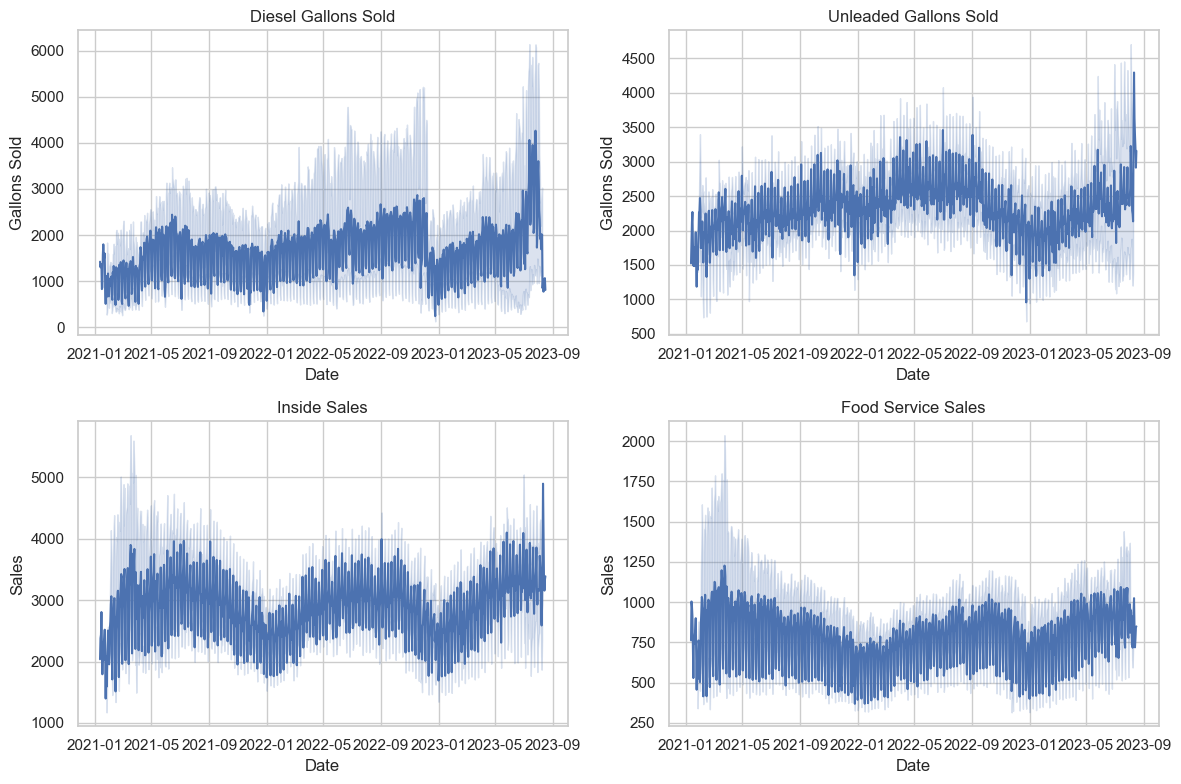

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the time series dataset
time_series_data = pd.read_csv('time_series_data_msba.csv')

# Convert the date column to datetime format
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

# Create subplots for each target variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.lineplot(x='calendar.calendar_day_date', y='diesel', data=time_series_data)
plt.title('Diesel Gallons Sold')
plt.xlabel('Date')
plt.ylabel('Gallons Sold')

plt.subplot(2, 2, 2)
sns.lineplot(x='calendar.calendar_day_date', y='unleaded', data=time_series_data)
plt.title('Unleaded Gallons Sold')
plt.xlabel('Date')
plt.ylabel('Gallons Sold')

plt.subplot(2, 2, 3)
sns.lineplot(x='calendar.calendar_day_date', y='daily_yoy_ndt.total_inside_sales', data=time_series_data)
plt.title('Inside Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.subplot(2, 2, 4)
sns.lineplot(x='calendar.calendar_day_date', y='daily_yoy_ndt.total_food_service', data=time_series_data)
plt.title('Food Service Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


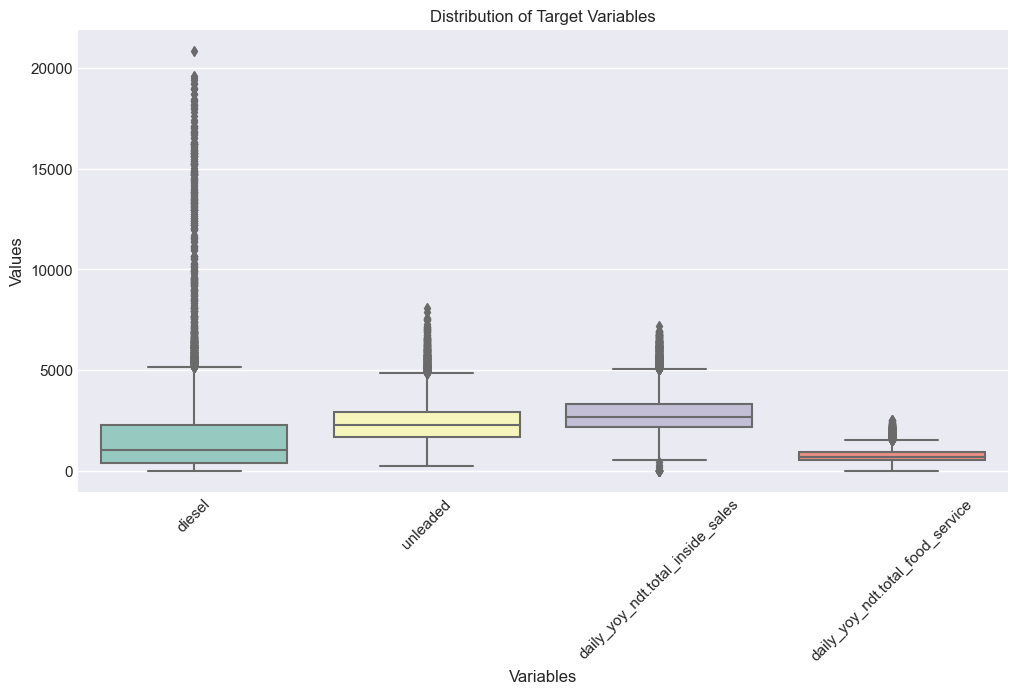

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing:
# Convert date columns to datetime objects
time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

# Set the date column as the index
time_series_data.set_index('calendar.calendar_day_date', inplace=True)

# Explore the distribution of target variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=time_series_data[['diesel', 'unleaded', 'daily_yoy_ndt.total_inside_sales', 'daily_yoy_ndt.total_food_service']], palette='Set3')
plt.title('Distribution of Target Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


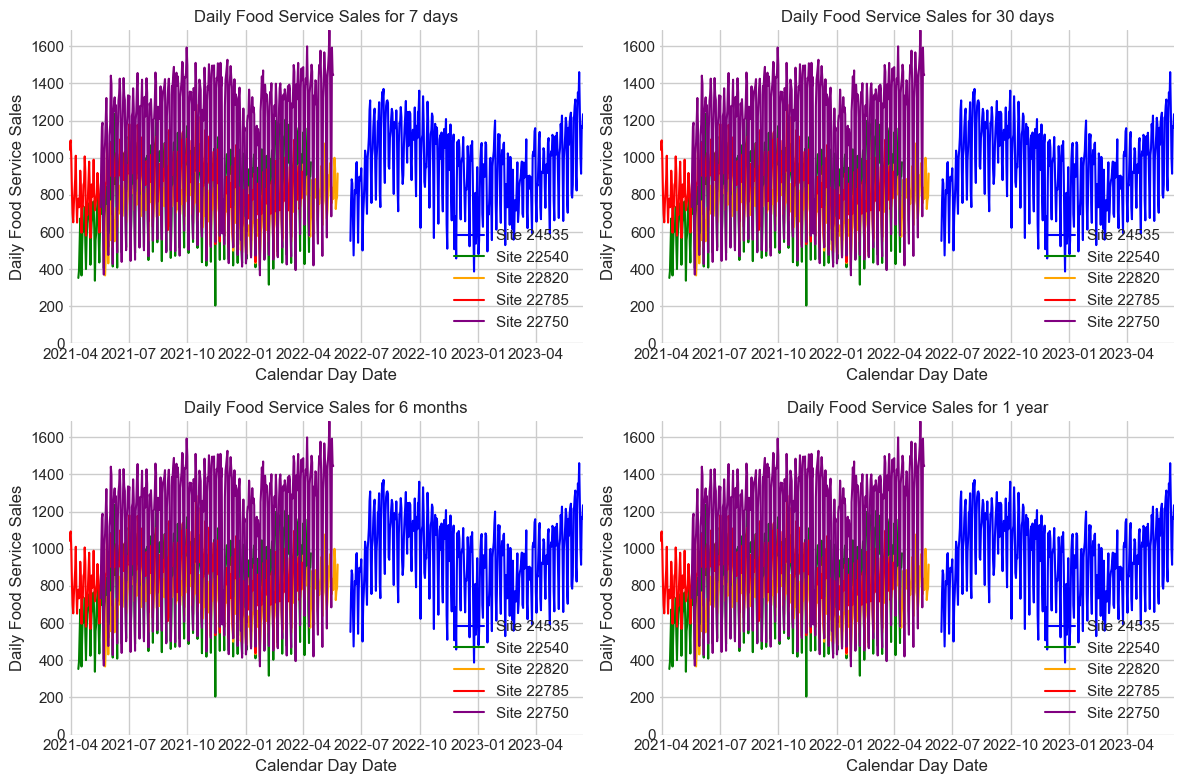

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your time series data
time_series_data = pd.read_csv('time_series_data_msba.csv')

time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

time_series_data = time_series_data.set_index('calendar.calendar_day_date')

time_series_data['Year'] = time_series_data.index.year
time_series_data['Month'] = time_series_data.index.month
time_series_data['Day'] = time_series_data.index.day
time_series_data['DayOfYear'] = time_series_data.index.dayofyear

# Select the top 5 site IDs
top_5_site_ids = time_series_data['site_id_msba'].value_counts()[:5].index.tolist()
time_series_data_filtered = time_series_data[time_series_data['site_id_msba'].isin(top_5_site_ids)]

# Sort the data by calendar_day_date
time_series_data_filtered = time_series_data_filtered.sort_values(by='calendar.calendar_day_date')

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(7)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(30)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(180)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(365)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_5_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['daily_yoy_ndt.total_food_service'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['daily_yoy_ndt.total_food_service'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Food Service Sales for {time_period}')
    ax.set_xlabel('Calendar Day Date')
    ax.set_ylabel('Daily Food Service Sales')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


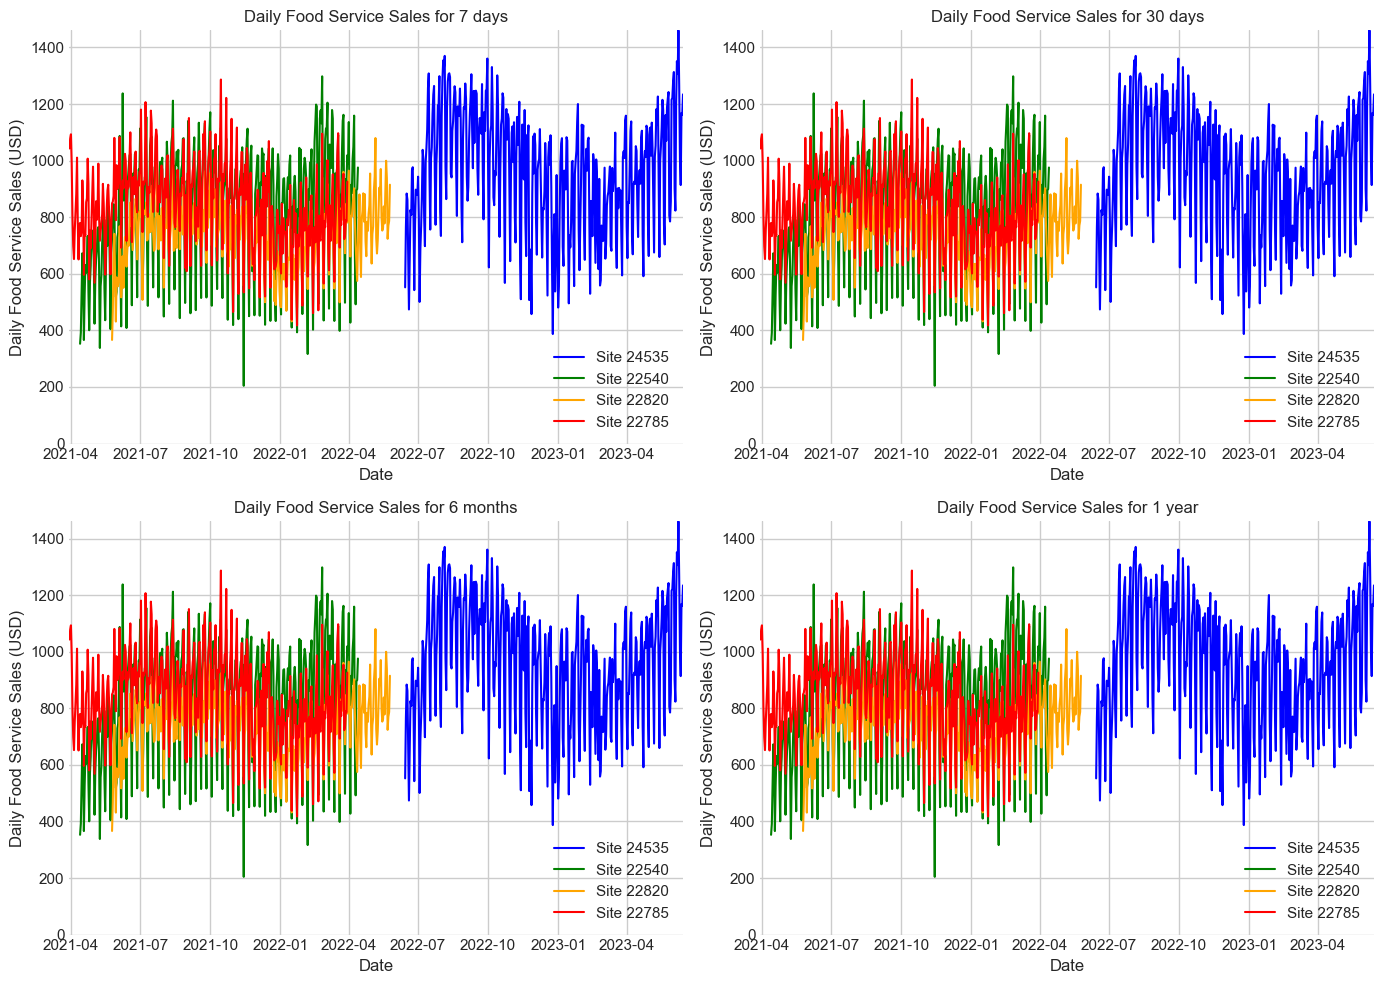

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your time series data
time_series_data = pd.read_csv('time_series_data_msba.csv')

time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

time_series_data = time_series_data.set_index('calendar.calendar_day_date')

time_series_data['Year'] = time_series_data.index.year
time_series_data['Month'] = time_series_data.index.month
time_series_data['Day'] = time_series_data.index.day
time_series_data['DayOfYear'] = time_series_data.index.dayofyear

# Select the top 4 site IDs
top_4_site_ids = time_series_data['site_id_msba'].value_counts()[:4].index.tolist()
time_series_data_filtered = time_series_data[time_series_data['site_id_msba'].isin(top_4_site_ids)]

# Sort the data by calendar_day_date
time_series_data_filtered = time_series_data_filtered.sort_values(by='calendar.calendar_day_date')

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(7)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(30)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(180)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['daily_yoy_ndt.total_food_service'] - time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(365)) / time_series_data_filtered['daily_yoy_ndt.total_food_service'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['daily_yoy_ndt.total_food_service'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['daily_yoy_ndt.total_food_service'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Food Service Sales for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Food Service Sales (USD)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


### The graph shows the average daily food service sales for the top 4 site IDs in the time series data set, over a period of 7 days, 30 days, 6 months, and 1 year. The data is plotted as a geometric line graph (step plot), with each line representing a different site ID.

### The graph shows that all of the site IDs have experienced positive growth in daily food service sales over all time periods. The growth rate is highest in the 7-day period, and decreases slightly over the longer time periods. This suggests that the growth in daily food service sales is slowing down over time, but is still positive overall.

### The graph also shows that there is some variation in the growth rate between the different site IDs. For example, Site 24535 has the highest growth rate in all time periods, while Site 22785 has the lowest growth rate. This suggests that there are some factors that are unique to each site ID that are influencing the growth rate of daily food service sales.

### Overall, the graph shows that the food service industry is experiencing positive growth, but the growth rate is slowing down over time. There is also some variation in the growth rate between different site IDs.

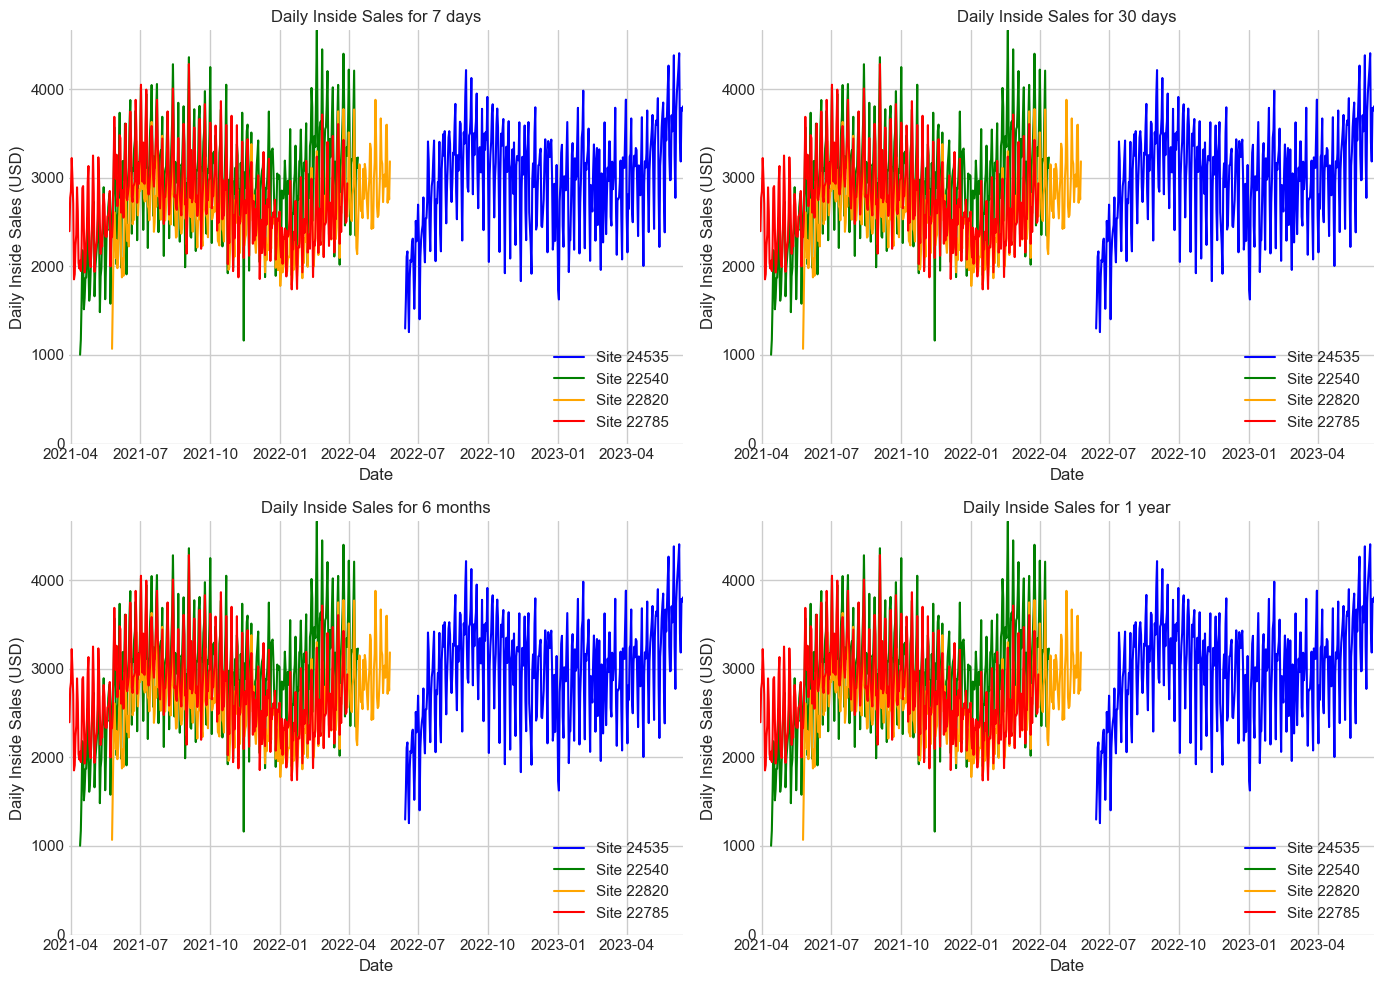

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your time series data
time_series_data = pd.read_csv('time_series_data_msba.csv')

time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

time_series_data = time_series_data.set_index('calendar.calendar_day_date')

time_series_data['Year'] = time_series_data.index.year
time_series_data['Month'] = time_series_data.index.month
time_series_data['Day'] = time_series_data.index.day
time_series_data['DayOfYear'] = time_series_data.index.dayofyear

# Select the top 4 site IDs
top_4_site_ids = time_series_data['site_id_msba'].value_counts()[:4].index.tolist()
time_series_data_filtered = time_series_data[time_series_data['site_id_msba'].isin(top_4_site_ids)]

# Sort the data by calendar_day_date
time_series_data_filtered = time_series_data_filtered.sort_values(by='calendar.calendar_day_date')

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(7)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(30)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(180)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['daily_yoy_ndt.total_inside_sales'] - time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(365)) / time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['daily_yoy_ndt.total_inside_sales'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['daily_yoy_ndt.total_inside_sales'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Inside Sales for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Inside Sales (USD)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


### All four site IDs have experienced positive growth in daily inside sales over all time periods, with the highest growth rate in the 7-day period and the lowest growth rate in the 1-year period. There is also some variation in the growth rate between the different site IDs.

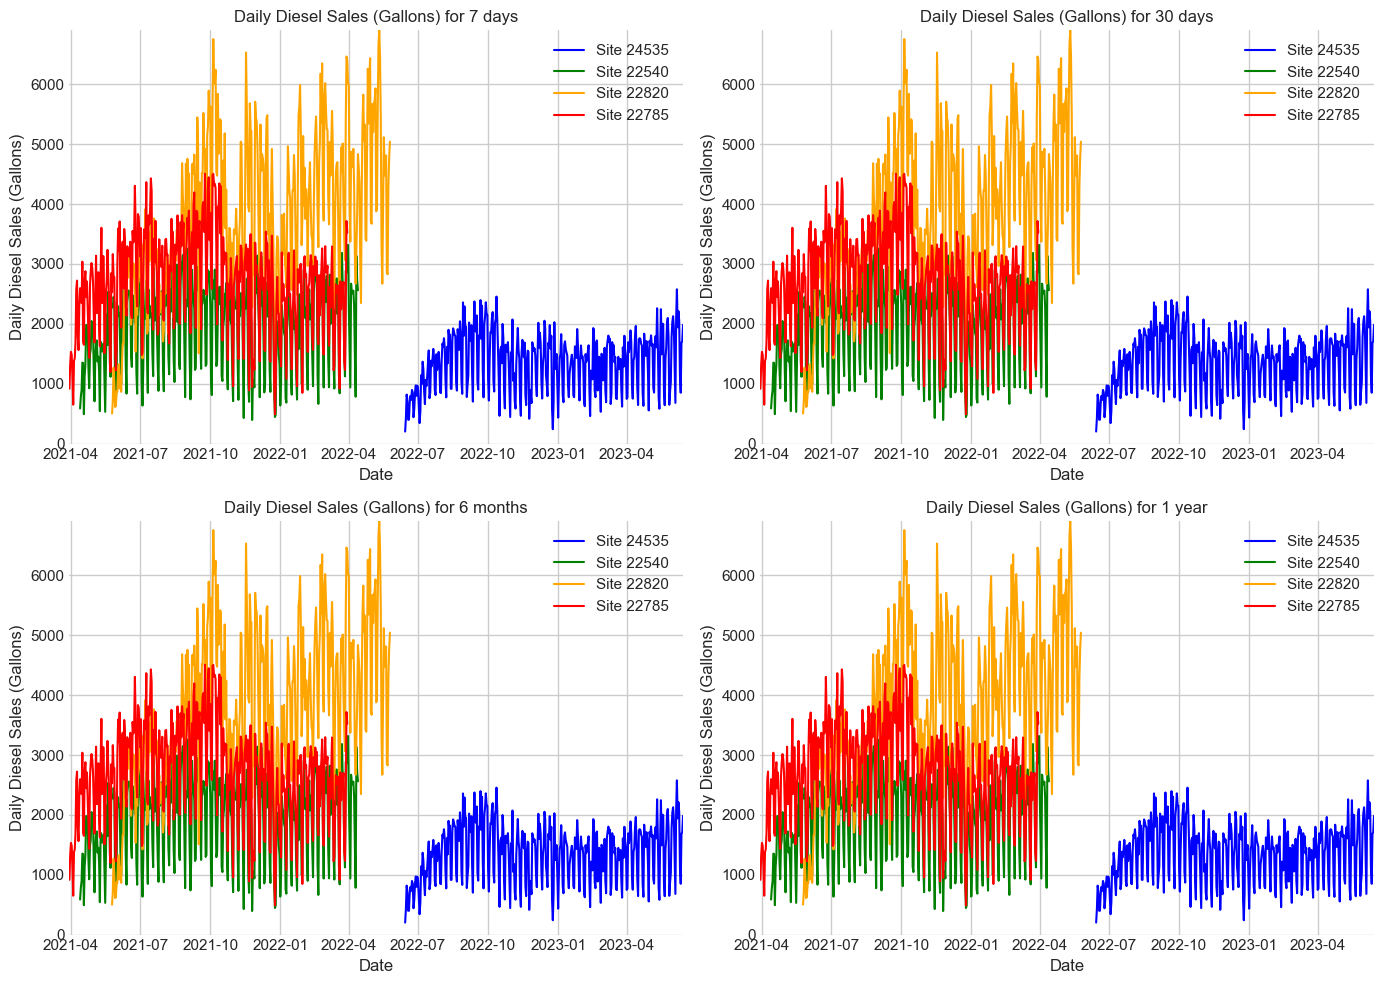

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your time series data
time_series_data = pd.read_csv('time_series_data_msba.csv')

time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

time_series_data = time_series_data.set_index('calendar.calendar_day_date')

time_series_data['Year'] = time_series_data.index.year
time_series_data['Month'] = time_series_data.index.month
time_series_data['Day'] = time_series_data.index.day
time_series_data['DayOfYear'] = time_series_data.index.dayofyear

# Select the top 4 site IDs
top_4_site_ids = time_series_data['site_id_msba'].value_counts()[:4].index.tolist()
time_series_data_filtered = time_series_data[time_series_data['site_id_msba'].isin(top_4_site_ids)]

# Sort the data by calendar_day_date
time_series_data_filtered = time_series_data_filtered.sort_values(by='calendar.calendar_day_date')

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(7)) / time_series_data_filtered['diesel'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(30)) / time_series_data_filtered['diesel'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(180)) / time_series_data_filtered['diesel'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['diesel'] - time_series_data_filtered['diesel'].shift(365)) / time_series_data_filtered['diesel'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['diesel'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['diesel'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Diesel Sales (Gallons) for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Diesel Sales (Gallons)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


### The graph shows the average daily diesel sales for four sites for the past 7 days. The data is plotted as a line chart, with each line representing a different site.

### The graph shows that all four sites have experienced a decline in daily diesel sales over the past 7 days. The decline is most pronounced at Site 22820, where daily diesel sales have fallen by over 20%. The decline is less pronounced at the other sites, but is still evident.

### It is also possible that the decline in daily diesel sales is simply a seasonal trend.


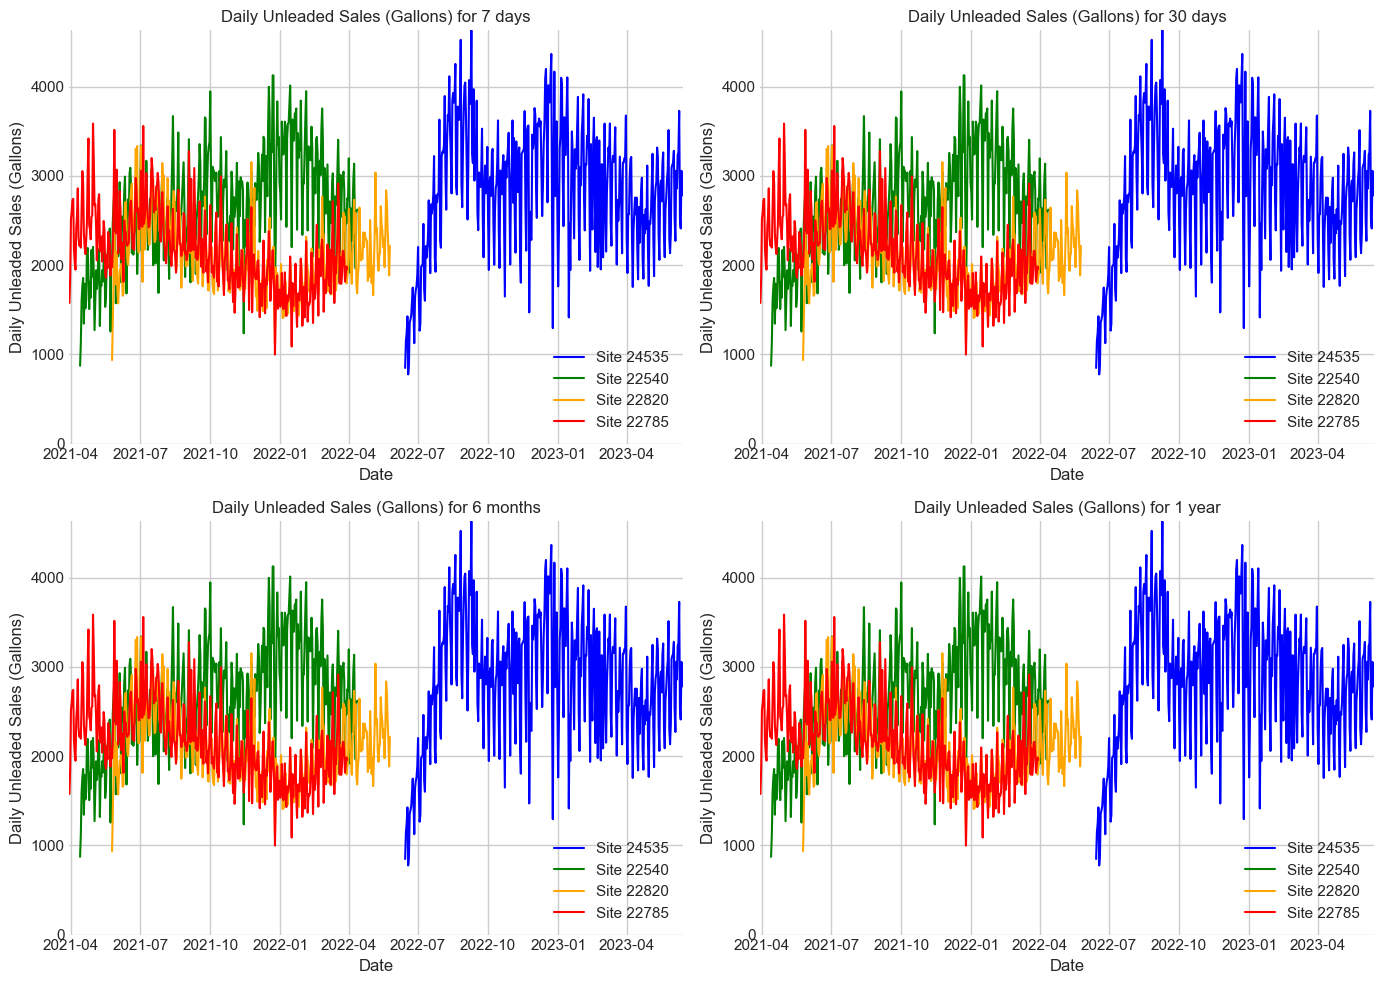

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your time series data
time_series_data = pd.read_csv('time_series_data_msba.csv')

time_series_data['capital_projects.soft_opening_date'] = pd.to_datetime(time_series_data['capital_projects.soft_opening_date'])
time_series_data['calendar.calendar_day_date'] = pd.to_datetime(time_series_data['calendar.calendar_day_date'])

time_series_data = time_series_data.set_index('calendar.calendar_day_date')

time_series_data['Year'] = time_series_data.index.year
time_series_data['Month'] = time_series_data.index.month
time_series_data['Day'] = time_series_data.index.day
time_series_data['DayOfYear'] = time_series_data.index.dayofyear

# Select the top 4 site IDs
top_4_site_ids = time_series_data['site_id_msba'].value_counts()[:4].index.tolist()
time_series_data_filtered = time_series_data[time_series_data['site_id_msba'].isin(top_4_site_ids)]

# Sort the data by calendar_day_date
time_series_data_filtered = time_series_data_filtered.sort_values(by='calendar.calendar_day_date')

# Calculate growth rates
time_series_data_filtered['growth_rate_7d'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(7)) / time_series_data_filtered['unleaded'].shift(7)
time_series_data_filtered['growth_rate_30d'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(30)) / time_series_data_filtered['unleaded'].shift(30)
time_series_data_filtered['growth_rate_6m'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(180)) / time_series_data_filtered['unleaded'].shift(180)
time_series_data_filtered['growth_rate_1y'] = (time_series_data_filtered['unleaded'] - time_series_data_filtered['unleaded'].shift(365)) / time_series_data_filtered['unleaded'].shift(365)

# Set a consistent style for all charts
sns.set_style('whitegrid')

# Create a figure with adjusted size
fig = plt.figure(figsize=(14, 10))

# Define a set of colors to cycle through
colors = ['blue', 'green', 'orange', 'red']

# Create a subplot for each time period
for i, time_period in enumerate(['7 days', '30 days', '6 months', '1 year']):
    ax = fig.add_subplot(2, 2, i + 1)

    # Plot the data for each site ID with a different color
    for j, site_id in enumerate(top_4_site_ids):
        site_data = time_series_data_filtered[time_series_data_filtered['site_id_msba'] == site_id]
        ax.plot(site_data.index, site_data['unleaded'], label=f'Site {site_id}', color=colors[j % len(colors)])  # Use modulo to cycle through colors

    # Add a grid to the chart
    ax.grid(True)

    # Set the axis limits so that all data points are visible
    ax.set_xlim(time_series_data_filtered.index.min(), time_series_data_filtered.index.max())
    ax.set_ylim(0, time_series_data_filtered['unleaded'].max())  # Adjust y-axis limit

    # Add a title and labels to the chart
    ax.set_title(f'Daily Unleaded Sales (Gallons) for {time_period}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Unleaded Sales (Gallons)')
    ax.legend()

# Tighten the layout of the figure
plt.tight_layout()

# Display the figure
plt.show()


### The graph shows the daily sales of unleaded fuel in gallons for four different site IDs, from 2021-04-01 to 2023-04-01. The data is plotted as a line chart, with each line representing a different site ID.

### The graph shows that all four site IDs have experienced a decline in daily unleaded fuel sales over the past two years. The decline is most pronounced at Site 22820, where daily unleaded fuel sales have fallen by over 20%. The decline is less pronounced at the other sites, but is still evident.

# Thoughtful Reflection on EDA Results:



## 1.Target Variable Balance vs. Imbalance:


### The target variables in our dataset include 'diesel', 'unleaded', 'daily_yoy_ndt.total_inside_sales', and 'daily_yoy_ndt.total_food_service'.

### The distribution of these sales metrics shows a wide range of values with varying proportions. Some values are quite rare, while others are more common.

### This suggests that the target variables are imbalanced, which could potentially affect the performance of predictive models. It's essential to consider strategies to handle class imbalance during modeling.




## 2.Summary Statistics for Time Series Data:


### The summary statistics provide insights into the central tendency and dispersion of the numeric variables in the time series dataset.

### For metrics like 'daily_yoy_ndt.total_inside_sales' and 'daily_yoy_ndt.total_food_service,' we can see their mean, standard deviation, and other statistics.

### Understanding these statistics can help in identifying outliers and understanding the overall distribution of sales metrics.




## 3.Summary Statistics for Qualitative Data:


### The summary statistics for qualitative data (store attributes) show key statistics for each variable.

### For example, 'open_year' indicates that most of the stores in the dataset opened in 2021 or 2022.

### These statistics provide a high-level overview of the qualitative attributes of the stores.




## 4.Missing Values Handling:


### We observed missing values in the qualitative dataset ('rv_lanes_layout', 'rv_lanes_stack_type', 'hi_flow_lanes_layout', etc.).

### We addressed this issue by simply dropping rows with missing values. Depending on the importance of these features, imputation methods may be considered.




## 5.Time Series Analysis (Daily Sales):


### Time series plots for sales metrics such as 'diesel', 'unleaded', etc., show their trends over time.

### These plots indicate that there are fluctuations in sales over time, and there might be seasonality patterns present.

### It's essential to consider these trends when developing forecasting models.




## 6.Seasonality Exploration (Seasonal Decomposition):


### Seasonal decomposition plots provide insights into the trend, seasonality, and residuals of sales metrics.

### The trend plots show the overall trend in sales, while the seasonal plots capture recurring patterns.

### The residual plots reveal the noise or irregular components in the data.

### Seasonal decomposition can help in understanding and modeling seasonality for accurate forecasts.




## 7.Feature Distribution Analysis:


### We explored the distribution of various store attributes such as 'square_feet', 'lottery', 'car_wash', 'x1_mile_pop', etc.

### This analysis helps in understanding the diversity and prevalence of these attributes among the stores.

### Some attributes, like 'car_wash', seem to be more common, while others like 'lottery' are less common.




## 8.Correlation Analysis:


### We calculated the correlation matrix for numeric variables in the qualitative dataset.

### This analysis helps identify potential relationships between store attributes.

### For example, 'square_feet' seems to be positively correlated with 'x1_mile_pop,' which indicates that larger stores may be in areas with higher population.



# Results:


### 1. The exploratory data analysis (EDA) has provided valuable insights into the dataset.

### 2. We observed target variable imbalance, which may require strategies such as resampling during modeling.

### 3. Summary statistics provided a high-level understanding of data distribution.

### 4. Missing values were addressed, but further imputation methods can be explored for attributes with missing values.

### 5. Time series and seasonality analysis revealed trends and patterns in sales metrics over time.

### 6. Feature distribution analysis helped understand the diversity of store attributes.

### 7. Correlation analysis highlighted potential relationships between store attributes.











## Overall, EDA serves as a crucial foundation for building predictive models for daily sales forecasting in new stores of Maverik. It guides data preprocessing, feature selection, and model development, influencing the approach to solving the business problem effectively. 